In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Loading data set

In [2]:
df=pd.read_csv(r"C:\Users\sujat\Downloads\Fish Dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
print('shape of dataset=',df.shape)

shape of dataset= (159, 7)


In [4]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.rename(columns={"Length1":"VerticalLen","Length2":"DiagonalLen","Length3":"CrossLen"},inplace=True)

In [6]:
df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.isnull().sum()

Species        0
Weight         0
VerticalLen    0
DiagonalLen    0
CrossLen       0
Height         0
Width          0
dtype: int64

In [9]:
df_sp=df.Species.value_counts()
df_sp

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
df_sp=pd.DataFrame(df_sp)
df_sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


KeyError: 'figure.fidsize is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

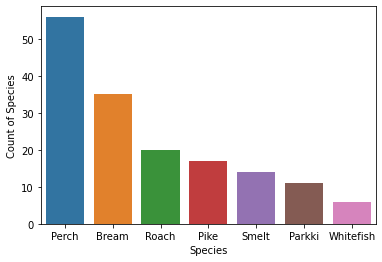

In [11]:
sns.barplot(x=df_sp.index,y=df_sp.Species)
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.fidsize"]=(10,6)
plt.title('Fish Count Based On Species')
plt.show()

In [12]:
df[df.Weight<=0]

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [13]:
df1=df.drop([40])
print('New dimension of dataset is=',df1.shape)
df1.head(5)

New dimension of dataset is= (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Correlation Check

In [14]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

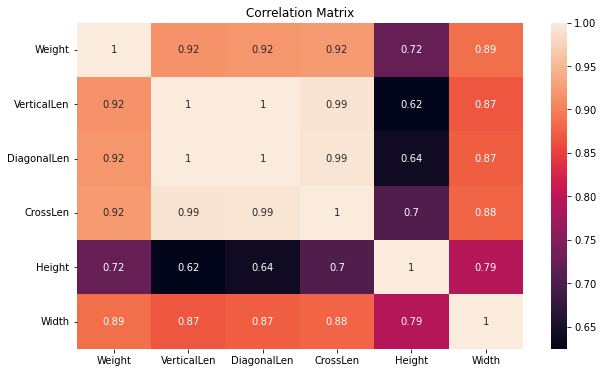

In [15]:
plt.rcParams["figure.figsize"]=(10,6)
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation Matrix')

In [16]:
df2=df1.drop(['VerticalLen','DiagonalLen','CrossLen'],axis=1)
print('New dimension of dataset is=',df2.shape)
df2.head()

New dimension of dataset is= (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


# Visulization Using Pairplot

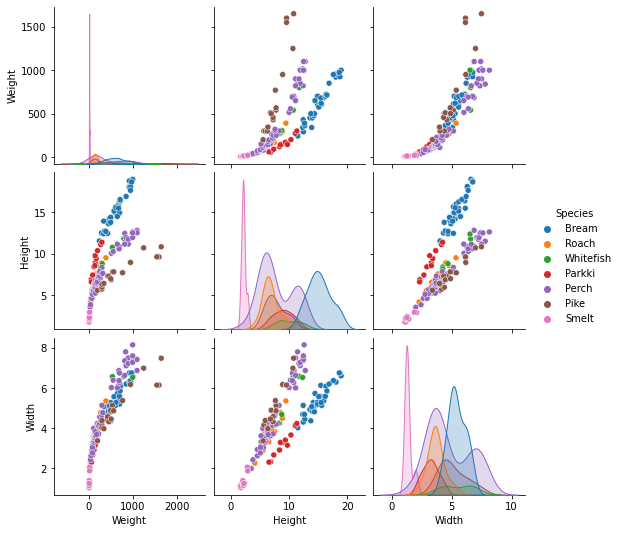

In [17]:
sns.pairplot(df2,kind='scatter',hue="Species")

Text(0.5, 1.0, 'Outlier Detection based on weight')

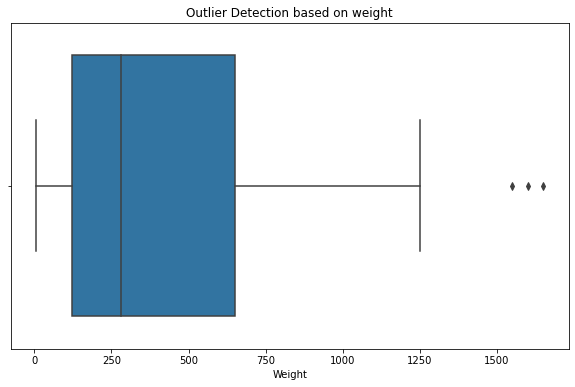

In [18]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on weight')

In [19]:
def outlier_detection(datafram):
    Q1=datafram.quantile(0.25)
    Q3=datafram.quantile(0.75)
    IQR=Q3-Q1
    upper_end=Q3+1.5*IQR
    lower_end=Q3-1.5*IQR
    outlier=datafram[(datafram>upper_end)|(datafram<lower_end)]
    return outlier

In [20]:
outlier_detection(df2["Weight"])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'outlier Detection based on Height')

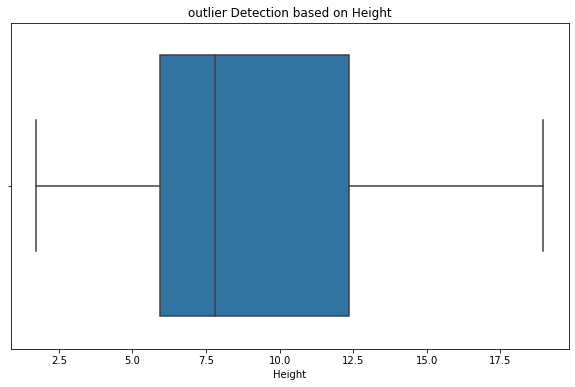

In [21]:
sns.boxplot(x=df2["Height"])
plt.title('outlier Detection based on Height')

Text(0.5, 1.0, 'outlier Detection based on Width')

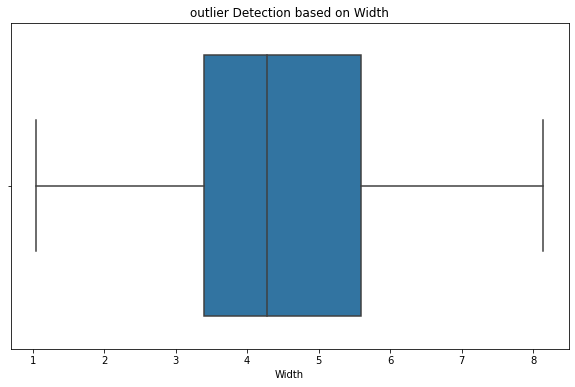

In [22]:
sns.boxplot(x=df2["Width"])
plt.title('outlier Detection based on Width')

In [23]:
df3=df2.drop([142,143,144])
df3.shape

(155, 4)

In [24]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


# Build Machine Learning Model

In [31]:
X = df3[['Height','Width']].values
df3.head(5)

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [37]:
y=df3.iloc[:,[1]]
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from collections import Counter

In [41]:
print(Counter(y_train))

Counter({'Weight': 1})


In [42]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [43]:
print('coef=',model.coef_)
print('intercept',model.intercept_)
print('score=',model.score(x_test,y_test))

coef= [[ 11.52044087 157.00427141]]
intercept [-415.06891534]
score= 0.8589849641842606


In [44]:
predictedWeight = pd.DataFrame(model.predict(x_test), columns=['Predicted Weight'])
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted

,Weight,Predicted Weight
0,720.0,729.582247
1,130.0,221.378266
2,12.2,-191.670907
3,685.0,787.962321
4,700.0,649.525678
5,390.0,467.245103
6,160.0,265.762372
7,300.0,400.093532
8,306.0,421.088712
9,850.0,838.088970
